# Part2. 데이터탐색과 데이터정제

In [4]:
import pandas as pd
import numpy as np
data=pd.read_csv('C:/Users/kwkan/pythonStudy/sampleData/Ex_CEOSalary.csv',encoding='utf-8')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   salary    209 non-null    int64  
 1   sales     209 non-null    float64
 2   roe       209 non-null    float64
 3   industry  209 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 6.7 KB


In [7]:
data.head()

,salary,sales,roe,industry
0,1095,27595.000000,14.1,1
1,1001,9958.000000,10.9,1
2,1122,6125.899902,23.5,1
3,578,16246.000000,5.9,1
4,1368,21783.199219,13.8,1


In [8]:
data['industry'].value_counts()

1    72
3    60
2    46
4    31
Name: industry, dtype: int64

In [9]:
data['industry'] = data['industry'].replace([1,2,3,4], ['Service','IT','Finance','Others'])
data['industry'].value_counts()

Service    72
Finance    60
IT         46
Others     31
Name: industry, dtype: int64

In [13]:
%matplotlib inline #패키지를 가져와 코드안에 수행 한다는 의미
data['industry'].value_counts().plot(kind="pie") #종류를 pie로 선택
data['industry'].value_counts().plot(kind="bar") #종류를 bar로 선택

UsageError: unrecognized arguments: #패키지를 가져와 코드안에 수행 한다는 의미


<AxesSubplot:>

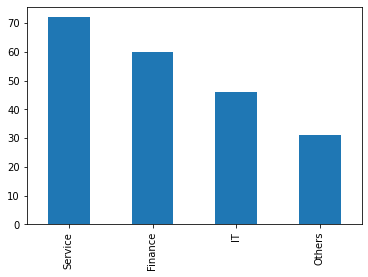

In [15]:
%matplotlib inline 
##data['industry'].value_counts().plot(kind="pie") 
data['industry'].value_counts().plot(kind="bar") 

In [16]:
#기술통계량
data.describe()

,salary,sales,roe
count,209.000000,209.000000,209.000000
mean,1281.119617,6923.793282,17.184211
std,1372.345308,10633.271088,8.518509
min,223.000000,175.199997,0.500000
25%,736.000000,2210.300049,12.400000
50%,1039.000000,3705.199951,15.500000
75%,1407.000000,7177.000000,20.000000
max,14822.000000,97649.898438,56.299999


In [17]:
#왜도와 첨도 확인하여 정규분포와 유사한지를 검토
data.skew() ##왜도    

salary    6.904577
sales     5.035336
roe       1.572126
dtype: float64

In [18]:
data.kurtosis()##첨도

salary    58.971229
sales     33.115193
roe        3.797366
dtype: float64

array([[<AxesSubplot:title={'center':'salary'}>,
        <AxesSubplot:title={'center':'sales'}>],
       [<AxesSubplot:title={'center':'roe'}>, <AxesSubplot:>]],
      dtype=object)

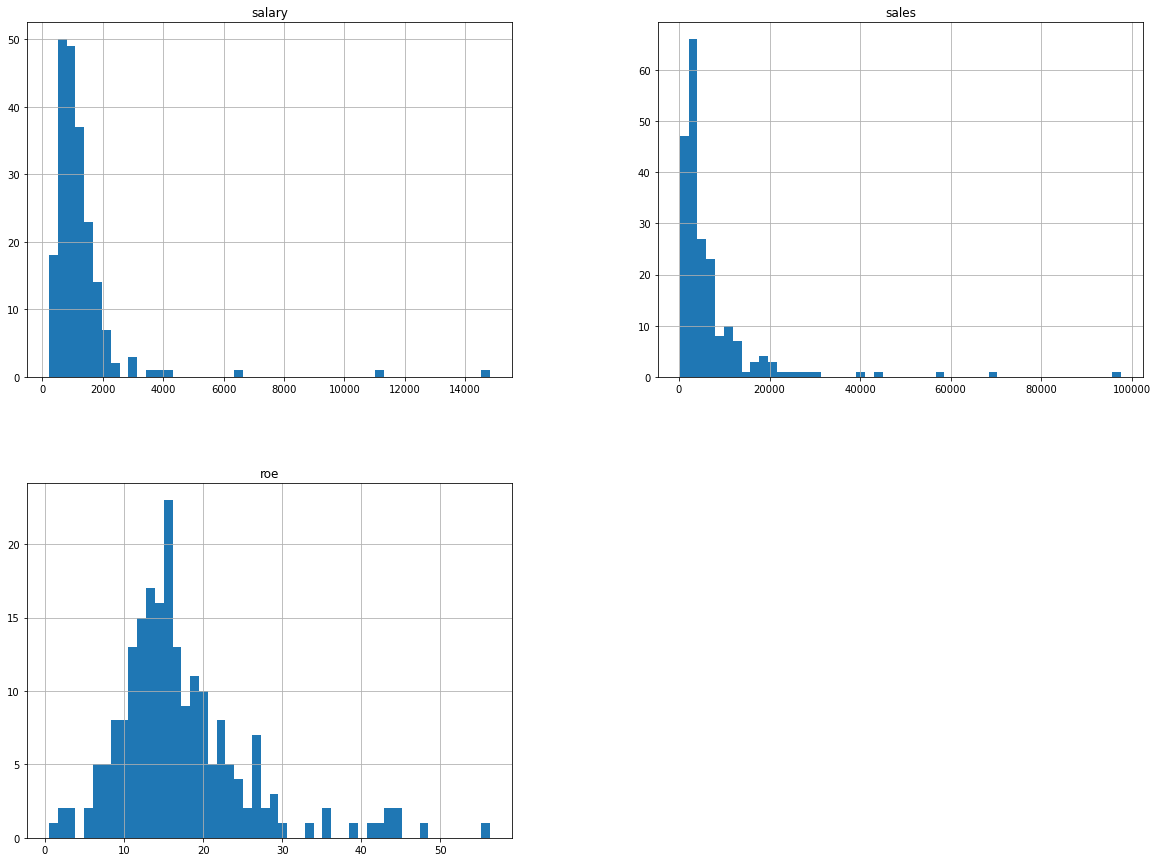

In [61]:
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20,15))

<AxesSubplot:>

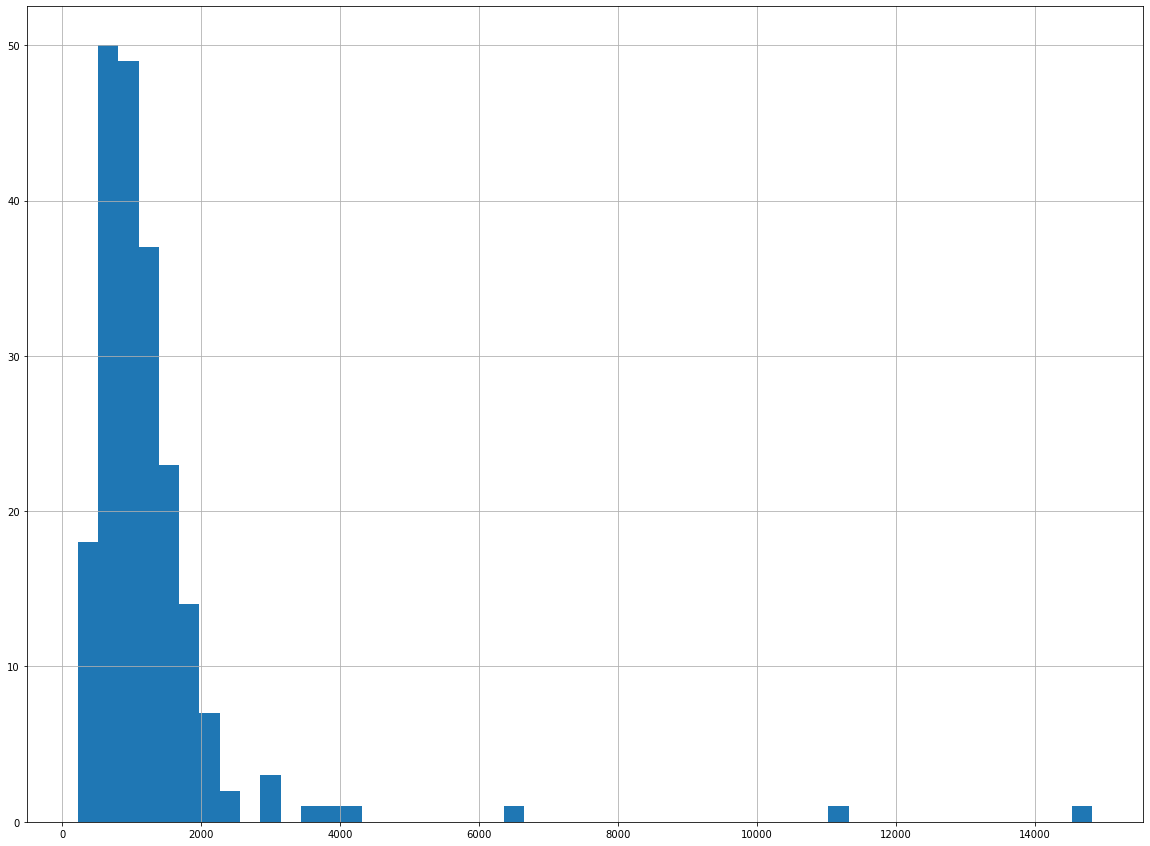

In [62]:
data['salary'].hist(bins=50, figsize=(20,15))

In [63]:
#상관계수 파악하는 method를 지정할 수 있다. 
#default는 pearson이며, spearman, kendall 도 가능
data.corr() #두 변수 간의 상관계수를 파악할 수 있다
#data.corr(method='pearson')
#data.corr(method='spearman')
#data.corr(method='kendall')


,salary,sales,roe
salary,1.000000,0.119869,0.114842
sales,0.119869,1.000000,-0.055386
roe,0.114842,-0.055386,1.000000


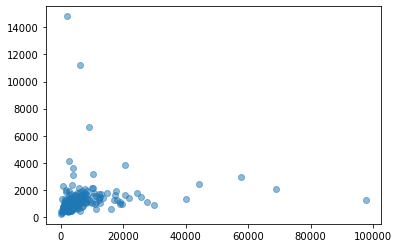

In [64]:
#산점도 그리기
import matplotlib.pyplot as plt
plt.scatter(data['sales'], data['salary'], alpha=0.5)
plt.show()
#결과를 보면 큰 이상치 때문에 관계가 왜곡되고 있다는 것을 파악할 수 있다

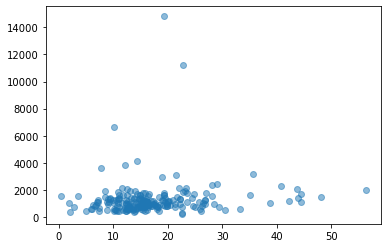

In [65]:
plt.scatter(data['roe'], data['salary'], alpha=0.5)
plt.show()
#roe도 마찬가지로 결과를 보면 큰 이상치 때문에 관계가 왜곡되고 있다는 것을 파악할 수 있다

In [66]:
data.groupby('industry')[['salary']].describe()

salary                                                            \
          count         mean          std    min     25%     50%      75%   
industry                                                                    
Finance    60.0  1722.416667  2242.687041  223.0  911.00  1246.0  1643.75   
IT         46.0  1344.913043  1002.813128  441.0  884.00  1119.5  1406.00   
Others     31.0   627.870968   175.264323  333.0  501.50   607.0   726.00   
Service    72.0  1153.875000   563.472032  256.0  811.25  1064.0  1348.50   

                   
              max  
industry           
Finance   14822.0  
IT         6640.0  
Others     1100.0  
Service    3844.0

# 이상치 처리

Boxplot(ax=<AxesSubplot:>, lines={'whiskers': [<matplotlib.lines.Line2D object at 0x000001AF78B06C40>, <matplotlib.lines.Line2D object at 0x000001AF78B06FA0>], 'caps': [<matplotlib.lines.Line2D object at 0x000001AF78B15340>, <matplotlib.lines.Line2D object at 0x000001AF78B156A0>], 'boxes': [<matplotlib.lines.Line2D object at 0x000001AF78B068E0>], 'medians': [<matplotlib.lines.Line2D object at 0x000001AF78B15A00>], 'fliers': [<matplotlib.lines.Line2D object at 0x000001AF78B15D60>], 'means': []})

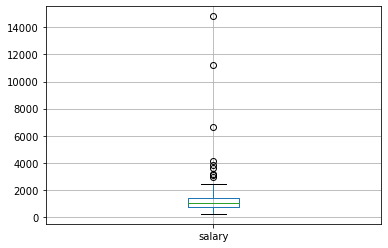

In [67]:
#box-whisker plot 으로 확인
data.boxplot(column='salary', return_type='both')
#data.boxplot(column='sales, return_type='both')
#data.boxplot(column='roe', return_type='both')

In [68]:
Q1_salary=data['salary'].quantile(q=0.25)
Q3_salary=data['salary'].quantile(q=0.75)
IQR_salary=Q3_salary-Q1_salary
IQR_salary

671.0

In [69]:
#IQR의 1.5배 +,_시켜서 이상치 제거한다 salary 기준
data_IQR = data[(data['salary'] < Q3_salary+1.5*IQR_salary) & (data['salary']>Q1_salary-1.5*IQR_salary)]

<AxesSubplot:>

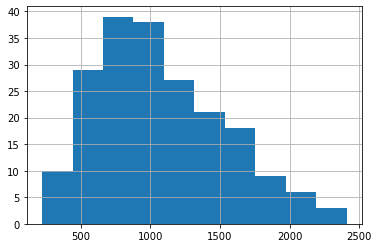

In [70]:
data_IQR['salary'].hist()

array([[<AxesSubplot:title={'center':'salary'}>,
        <AxesSubplot:title={'center':'sales'}>],
       [<AxesSubplot:title={'center':'roe'}>, <AxesSubplot:>]],
      dtype=object)

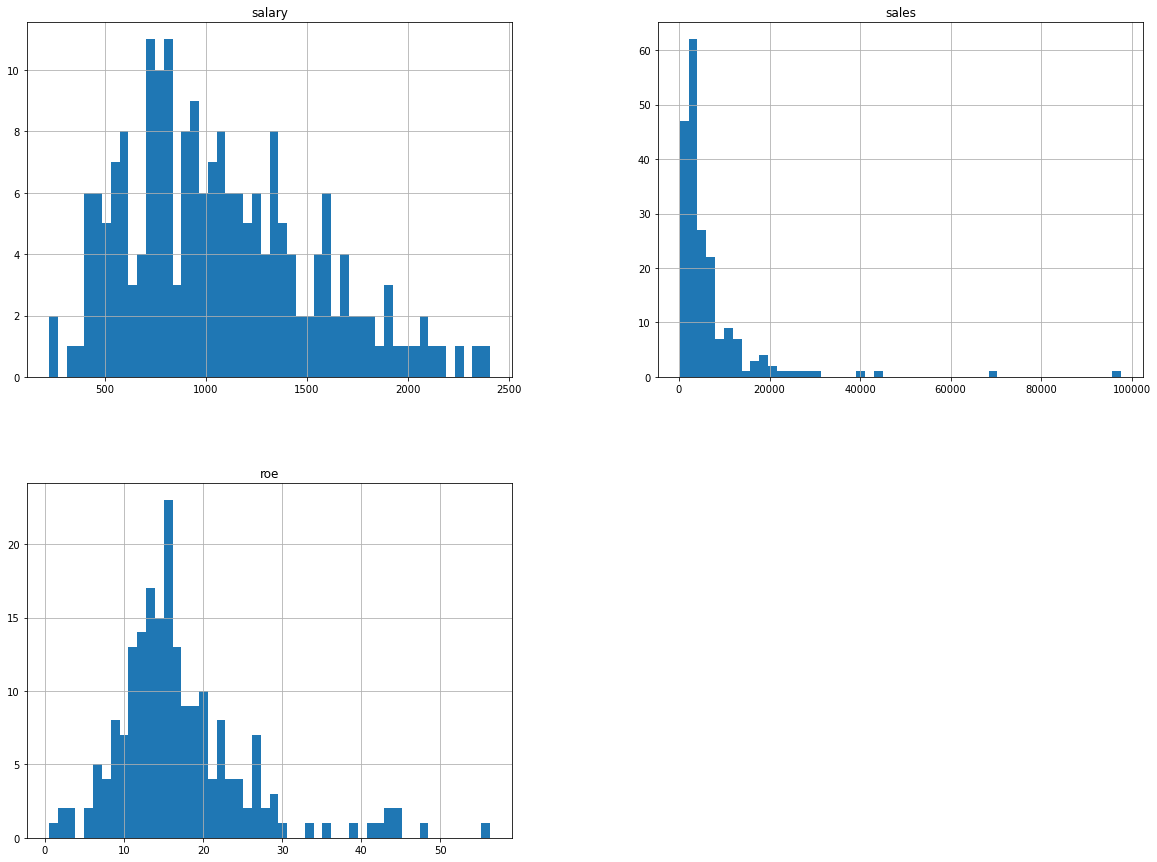

In [71]:
data_IQR.hist(bins=50, figsize=(20,15))

In [72]:
data_IQR.corr()

,salary,sales,roe
salary,1.000000,0.335446,0.289704
sales,0.335446,1.000000,-0.065034
roe,0.289704,-0.065034,1.000000


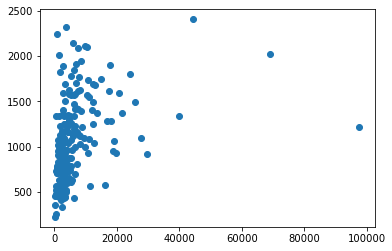

In [73]:
import matplotlib.pyplot as plt
plt.scatter(data_IQR['sales'], data_IQR['salary'])

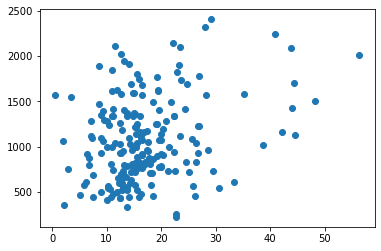

In [74]:
plt.scatter(data_IQR['roe'], data_IQR['salary'])
plt.show()

In [75]:
#IQR의 1.5배 +,_시켜서 이상치 제거한다 sales 기준
Q1_sales=data['sales'].quantile(q=0.25)
Q3_sales=data['sales'].quantile(q=0.75)
IQR_sales = Q3_sales - Q1_sales
IQR_sales


4966.6999511718695

In [76]:
#여기가 포인트!!!
data_IQR = data[(data['sales'] < Q3_sales+1.5*IQR_sales) & (data['sales']>Q1_sales-1.5*IQR_sales) & 
               (data['salary'] < Q3_salary+1.5*IQR_salary) & (data['salary']>Q1_salary-1.5*IQR_salary)]

<AxesSubplot:>

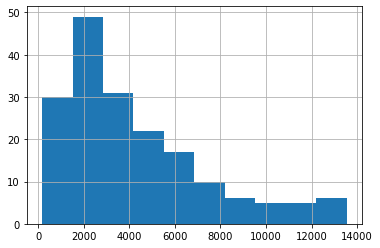

In [77]:
data_IQR['sales'].hist()

array([[<AxesSubplot:title={'center':'salary'}>,
        <AxesSubplot:title={'center':'sales'}>],
       [<AxesSubplot:title={'center':'roe'}>, <AxesSubplot:>]],
      dtype=object)

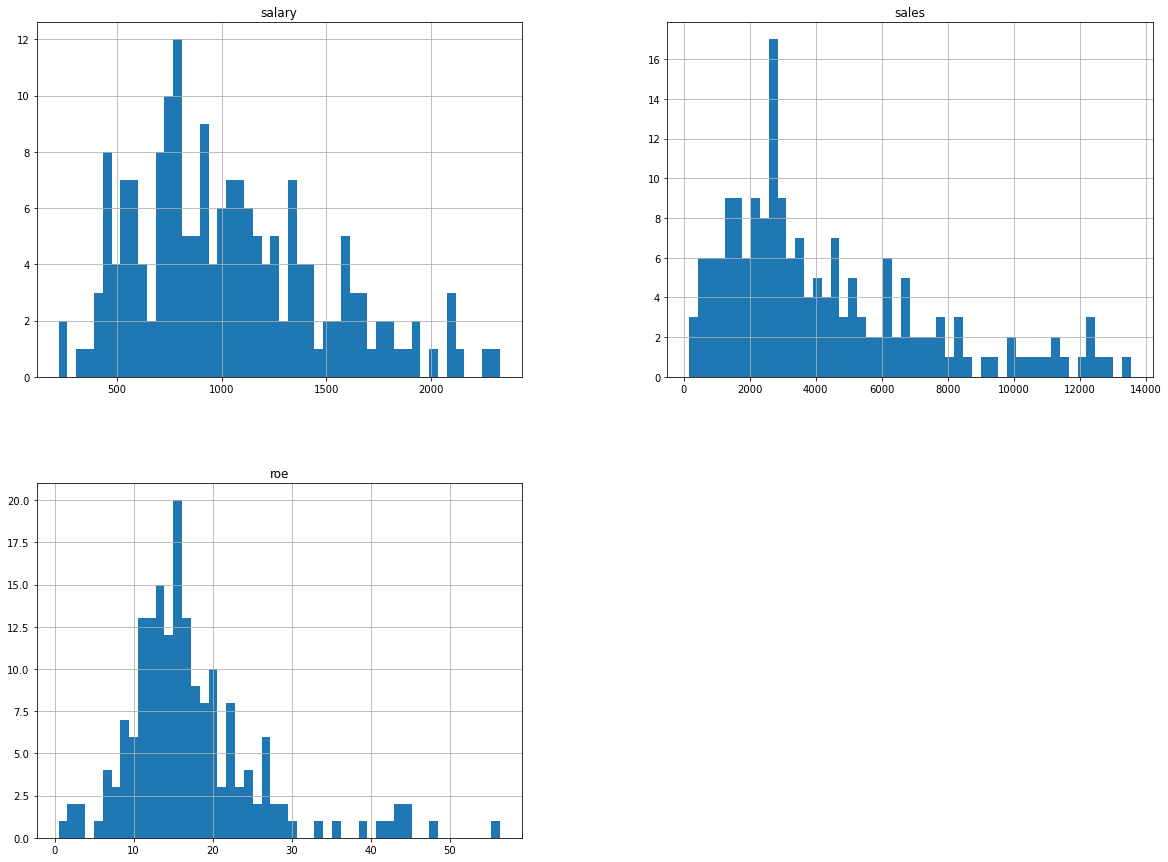

In [79]:
data_IQR.hist(bins=50, figsize=(20,15))

In [80]:
data_IQR.corr()

,salary,sales,roe
salary,1.000000,0.471278,0.299153
sales,0.471278,1.000000,-0.076046
roe,0.299153,-0.076046,1.000000
